# Plotting odometry data

To run this notebook you will need to be working in an environment where pupil_recording_interface and the other packages listed below have been installed. It is suggested to create a new environment called "odometry" following the instructions in the readme.
    -and to install the pupil_recording_interface package first using 'conda install -c vedb pupil_recording_interface'. 

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Get Session loader from VEDB utils
%run ../../code/vedb_utils.py

import pupil_recording_interface as pri

## Load data

In [5]:
folder = Path("/home/data/odometry/")
subject = "example_session"

Below, we use pupil_recording_interface to load the data

In [6]:
ls /home/data/odometry/

example_session/  total_acc_x_train.txt*


In [8]:
# Load all fields in a list of dictionaries
session = Session(folder=folder / subject)
accel_time, accel_all = session.load("accel", time_idx=(0, 2000), time_idx=None)
gyro_time, gyro_all = session.load("gyro", frame_idx=(0, 2000), time_idx=None)
odometry_time, odometry_all = session.load('odometry', frame_idx=(0, 2000), time_idx=None)

Missing timestamps for tracking_camera


Note to Pogen: 

This loader either loads a list of dictionaries (just specifying 'accel' below) or an array, if you specify which specific data from accel to load ('accel:linear_acceleration')

In [13]:
accel_time, accel = session.load("accel:linear_acceleration", frame_idx=(0, 2000), time_idx=None)
gyro_time, gyro = session.load("gyro:angular_velocity", frame_idx=(0, 2000), time_idx=None)
odometry_time, odometry = session.load('odometry', frame_idx=(0, 2000), time_idx=None)

In [14]:
accelpri = pri.load_dataset(folder / subject, accel="recording", cache=False)
gyropri = pri.load_dataset(folder / subject, gyro="recording", cache=False)
odometrypri = pri.load_dataset(folder / subject, odometry="recording", cache=False)

Now let's see what we've got loaded. First we will look at the raw data from the Realsense gyroscope. It is an xarray dataset which is convenient for working with multidimensional data (http://xarray.pydata.org/en/stable/). In this case we have the 3 dimensions of angular velocity varying over time.


In [15]:
gyro_time.shape, gyro.shape

((2000,), (2000, 3))

In [24]:
gyrox[0]

{'topic': 'gyro',
 'timestamp': 1033065.516041126,
 'source_timestamp': 1620666171.9387548,
 'angular_velocity': [0.006391781847923994,
  0.12357444316148758,
  -0.07137490063905716]}

The data is recorded at about 200 Hz and it is in units of radians/sec. Let's plot the first 10 seconds of the data (10sec x 200 frames/sec=2000 frames). Time is diplayed as hour:minute:second of the recording. This is a 5 hour recording, more than 3 million samples! Try editing the start and end indices to explore the data. Can you find segments where the activity is obviously different?

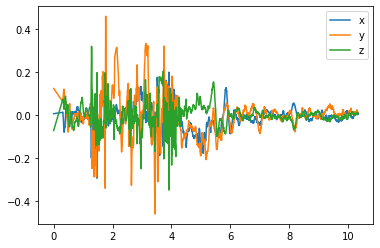

In [16]:
start_ind=0
end_ind=2000
plt.plot(gyro_time, gyro)
plt.legend(['x','y','z'])

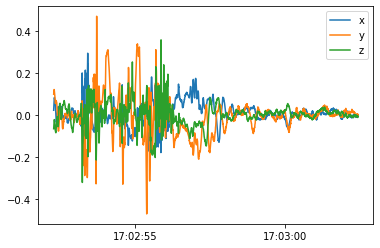

In [17]:
# Delete me
start_ind=0
end_ind=2000
plt.plot(gyropri.time[start_ind:end_ind],gyropri.angular_velocity[start_ind:end_ind])
plt.legend(['x','y','z'])

OK, now let's look at the raw accelerometer data.

In [18]:
accel_time, accel_all = session.load("accel", frame_idx=(0, 2000), time_idx=None)

In [19]:
accel_x[0]

{'topic': 'accel',
 'timestamp': 1033065.521051697,
 'source_timestamp': 1620666171.9348867,
 'linear_acceleration': [0.22947560250759125,
  10.039557456970215,
  0.5163201093673706]}

In [17]:
accel

<xarray.Dataset>
Dimensions:               (cartesian_axis: 3, quaternion_axis: 4, time: 3391498)
Coordinates:
  * time                  (time) datetime64[ns] 2021-05-10T17:02:52.268046080...
  * cartesian_axis        (cartesian_axis) <U1 'x' 'y' 'z'
  * quaternion_axis       (quaternion_axis) <U1 'w' 'x' 'y' 'z'
Data variables:
    position              (time, cartesian_axis) float64 0.0 0.0 ... -66.23
    linear_velocity       (time, cartesian_axis) float64 0.0 0.0 ... 0.01896
    angular_velocity      (time, cartesian_axis) float64 0.02149 ... -0.003685
    linear_acceleration   (time, cartesian_axis) float64 0.0 0.0 ... 0.1805
    angular_acceleration  (time, cartesian_axis) float64 1.825 1.825 ... -0.9135
    confidence            (time) int64 2 2 2 2 2 2 2 2 2 2 ... 3 3 3 3 3 3 3 3 3
    orientation           (time, quaternion_axis) float64 0.9995 ... -0.1801

In [19]:
accel.angular_velocity[:10]

<xarray.DataArray 'angular_velocity' (time: 10, cartesian_axis: 3)>
array([[ 0.02149357,  0.09807682, -0.06652477],
       [ 0.03790445,  0.1076662 , -0.05550344],
       [ 0.05113482,  0.1184035 , -0.04430884],
       [ 0.06947131,  0.12014983, -0.02848839],
       [ 0.07915548,  0.11743274, -0.02331065],
       [ 0.08209345,  0.11086927, -0.02279717],
       [ 0.07865907,  0.10387949, -0.02945145],
       [ 0.06407236,  0.08809779, -0.04517747],
       [ 0.05812298,  0.07296193, -0.05559979],
       [ 0.05463648,  0.06815314, -0.06544165]])
Coordinates:
  * time            (time) datetime64[ns] 2021-05-10T17:02:52.268046080 ... 2...
  * cartesian_axis  (cartesian_axis) <U1 'x' 'y' 'z'

In [21]:
av = np.asarray([o['angular_velocity'] for o in odometry])

In [25]:
np.allclose(av, accelpri.angular_velocity[0:2000], equal_nan=True)

True

In [20]:
gyro.angular_velocity[:10]

<xarray.DataArray 'angular_velocity' (time: 10, cartesian_axis: 3)>
array([[ 0.02149357,  0.09807682, -0.06652477],
       [ 0.03790445,  0.1076662 , -0.05550344],
       [ 0.05113482,  0.1184035 , -0.04430884],
       [ 0.06947131,  0.12014983, -0.02848839],
       [ 0.07915548,  0.11743274, -0.02331065],
       [ 0.08209345,  0.11086927, -0.02279717],
       [ 0.07865907,  0.10387949, -0.02945145],
       [ 0.06407236,  0.08809779, -0.04517747],
       [ 0.05812298,  0.07296193, -0.05559979],
       [ 0.05463648,  0.06815314, -0.06544165]])
Coordinates:
  * time            (time) datetime64[ns] 2021-05-10T17:02:52.268046080 ... 2...
  * cartesian_axis  (cartesian_axis) <U1 'x' 'y' 'z'

Notice, there are many fewer samples. This is because the accelerometer is only sampling at 60 Hz. We can plot accelerometer data similarly. Measurements are in unti of m/s^2. You can see that the accelerometer is consistently registering gravitational force of close to 9.8 m/s^2 along one or more of the axes. Again, try exploring the data to find segments that are obviously different. What do you think is causing those differences?

In [ ]:
start_ind=0
end_ind=600
plt.plot(accel.time[start_ind:end_ind],accel.linear_acceleration[start_ind:end_ind])
plt.legend(['x','y','z'])

OK, now let's look at the odometry data. These are the estimates that are generated by the Realsense using visual-inertial simulataneous localization and mapping (VI-SLAM). The main advantage is that we get complete estimates of linear and angular position, velocity, and acceleration, each with 3 degrees of freedom.

In [ ]:
odometry

All the data is at about 200 Hz, but notice that the number of samples differs slightly from the number for the gyroscope. We can plot any of these estimates using the same methods we used for the accelerometer and gyroscope. Let's start with exploring linear velocity, expressed in m/s.

In [27]:
odometrypri.time[start_ind] - odometrypri.time[0]

<xarray.DataArray 'time' ()>
array(0, dtype='timedelta64[ns]')
Coordinates:
    time     datetime64[ns] 2021-05-10T17:02:52.268046080

In [ ]:
start_ind=30000
end_ind=50000
plt.plot(odometry.time[start_ind:end_ind],odometry.linear_velocity[start_ind:end_ind])
plt.legend(['x','y','z'])

I've chosen a time segment where velocity transitions from about 0 m/s to about 1 m/s at time 17:05:45. What is happening here? Another transition occurs at the timepoint 17:06:30. What can account for this transition?

Now we will load one last dataset that is a processed version of the odometry data. It is stored in a NetCDF file, which is convenient for multidimensional time-varying data.

In [3]:
accel_calib = xr.open_dataset(folder / subject / "acceleration.nc")

Let's see what we've got

In [4]:
accel_calib

<xarray.Dataset>
Dimensions:            (cartesian_axis: 3, time: 957908)
Coordinates:
  * time               (time) datetime64[ns] 2021-05-10T17:03:51.006111860 .....
  * cartesian_axis     (cartesian_axis) object 'x' 'y' 'z'
Data variables:
    linear_acc         (time, cartesian_axis) float64 ...
    inertial_acc       (time, cartesian_axis) float64 ...
    gravitational_acc  (time, cartesian_axis) float64 ...
    inertial_2_acc     (time, cartesian_axis) float64 ...
    linear_vel         (time, cartesian_axis) float64 ...
    angular_vel        (time, cartesian_axis) float64 ...
    confidence         (time) float64 ...

Now let's plot the same time segment for linear velocity that we looked at above. 

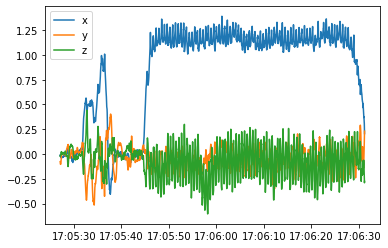

In [11]:
start_ind=6000;
end_ind=10000;
plt.plot(accel_calib.time[start_ind:end_ind],accel_calib.linear_vel[start_ind:end_ind])
plt.legend(['x','y','z'])

What is different in this processed version of the linear velocity data? What "processing" was done?